Census Income Project
Problem Statement:

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous. 

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. 


education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



To download the dataset, use the link given below.
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [2]:
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
df=pd.read_csv("census_Income.csv",index_col="Unnamed: 0")

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

we want to predict whether  the Income is <= 50k or > than 50k.
So this is a classification algorithm

In [6]:
df.shape

(32560, 15)

(32560, 15) is the size of the dataset

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB



'WorkClass', 'Education',Education_num, 'MaritalStatus', 'Occupation', relationship,race,sex, Native Country are categorical columns
        
'Age', 'FinalWeight','HoursPerWeek',capitalGain,CapitalLoss  are numeric columns.



In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing data in any feature

## EDA

In [10]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

the dataset is highly imbalances with more records having income <=50k

<AxesSubplot:xlabel='Income', ylabel='count'>

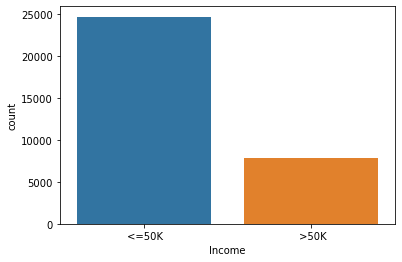

In [11]:
sns.countplot(df['Income'])

In [12]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

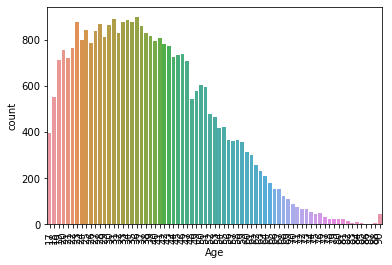

In [13]:
sns.countplot(df['Age'])
plt.xticks(rotation=90);

In [14]:
x=[1,2,2,2,3]
y=['M','M','M','F','F']

In [15]:
df1=pd.DataFrame({'a':x,'b':y},index=[1,2,3,4,5])

In [16]:
df1

,a,b
1,1,M
2,2,M
3,2,M
4,2,F
5,3,F


<AxesSubplot:xlabel='a', ylabel='Count'>

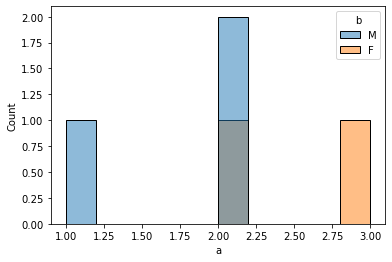

In [17]:
sns.histplot(x='a',data=df1,bins=10,hue='b',)

<AxesSubplot:xlabel='Age', ylabel='Count'>

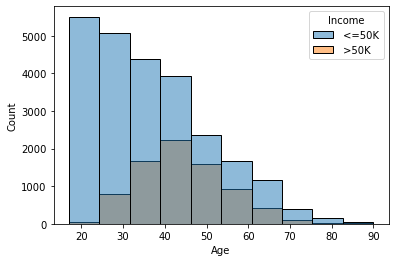

In [18]:
sns.histplot(x='Age',data=df,bins=10,hue='Income',)

in all the age groups, people with income less than 50k are far higher than people with income more than 50k

In [19]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [20]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

replacing ? with undisclosed

In [21]:
df['Workclass']=df['Workclass'].str.strip().replace({'?':'undisclosed'});

In [22]:
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
undisclosed          1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

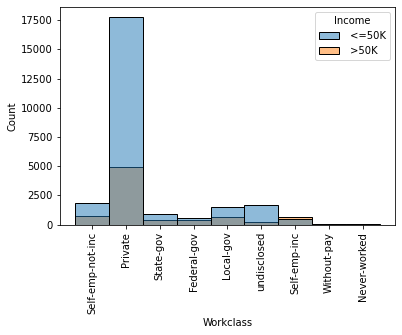

In [23]:

sns.histplot(data=df,x='Workclass',hue='Income')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

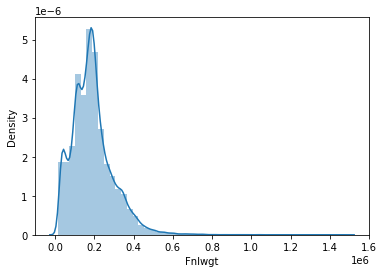

In [24]:
sns.distplot(df['Fnlwgt'])

In [25]:
df['Education_num'].value_counts()


9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [26]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Above 2 have same value counts for each category so one is a duplicate column so will drop it
The matching education level of the education number:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

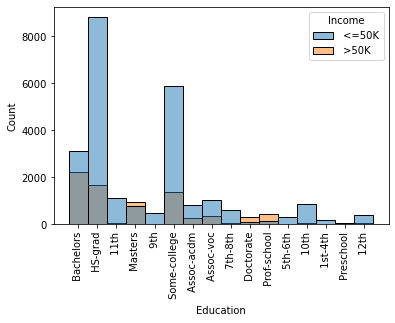

In [27]:

sns.histplot(data=df,x='Education',hue='Income')
plt.xticks(rotation=90);

In all the cases people with income less than 50k are more except higher education like Masters, Doctorate, prof school

In [28]:
df.drop('Education', inplace=True, axis=1)

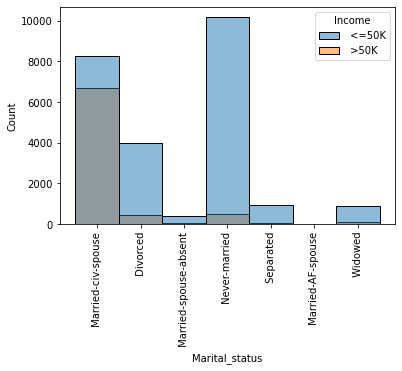

In [29]:

sns.histplot(data=df,x='Marital_status',hue='Income')
plt.xticks(rotation=90);

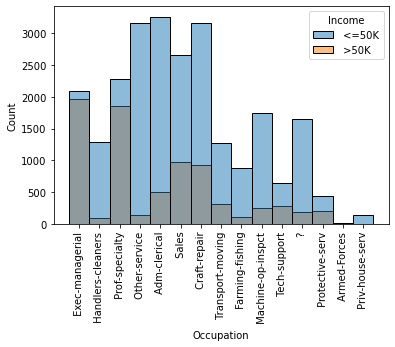

In [30]:

sns.histplot(data=df,x='Occupation',hue='Income')
plt.xticks(rotation=90);

In [31]:
df['Occupation']=df['Occupation'].str.strip().replace({'?':'undisclosed'});

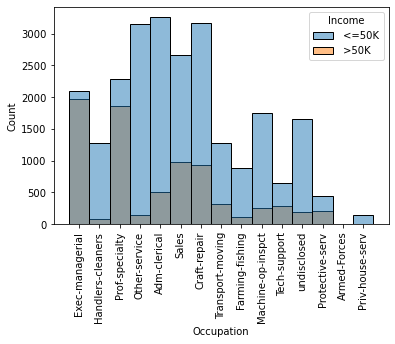

In [32]:
sns.histplot(data=df,x='Occupation',hue='Income')
plt.xticks(rotation=90);

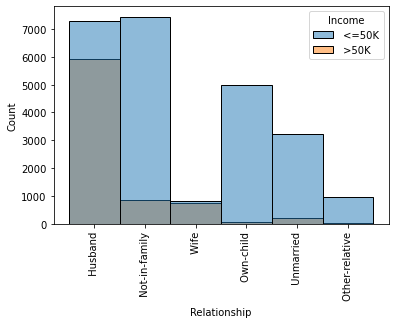

In [33]:
sns.histplot(data=df,x='Relationship',hue='Income')
plt.xticks(rotation=90);

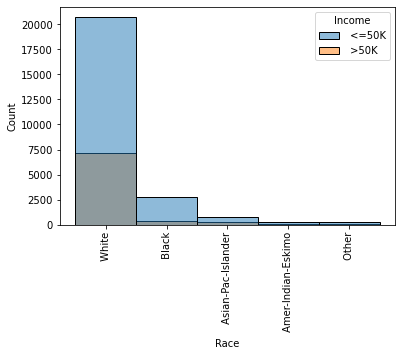

In [34]:
sns.histplot(data=df,x='Race',hue='Income')
plt.xticks(rotation=90);

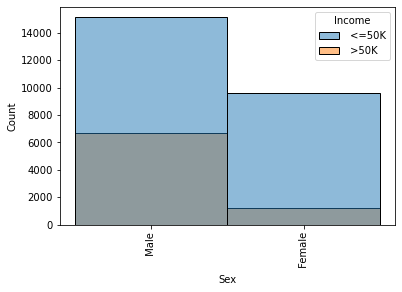

In [35]:
sns.histplot(data=df,x='Sex',hue='Income')
plt.xticks(rotation=90);

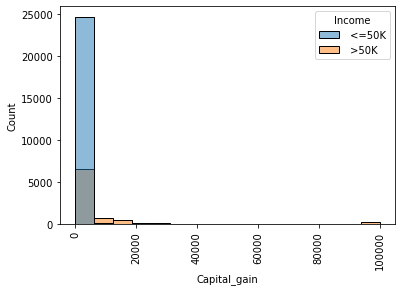

In [36]:
sns.histplot(data=df,x='Capital_gain',hue='Income')
plt.xticks(rotation=90);

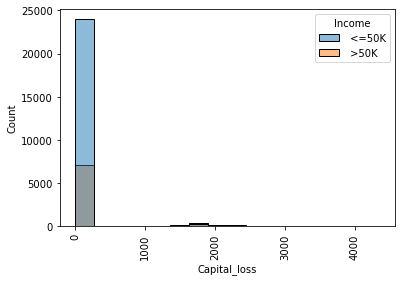

In [37]:
sns.histplot(data=df,x='Capital_loss',hue='Income')
plt.xticks(rotation=90);

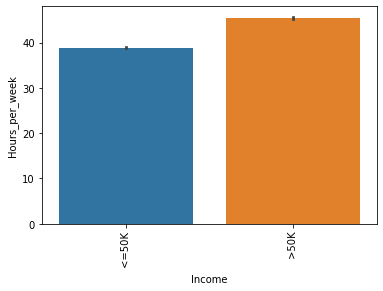

In [38]:
sns.barplot(data=df,y='Hours_per_week',x='Income')
plt.xticks(rotation=90);

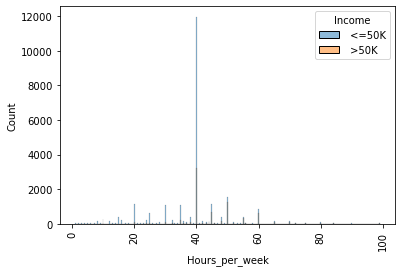

In [39]:
sns.histplot(data=df,x='Hours_per_week',hue='Income')
plt.xticks(rotation=90);

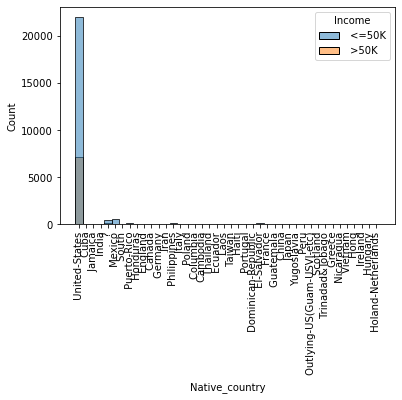

In [40]:
sns.histplot(data=df,x='Native_country',hue='Income')
plt.xticks(rotation=90);

In [41]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [42]:
df['Native_country']=df['Native_country'].str.strip().replace({'?':'undisclosed'});

In [43]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [44]:
categorical_columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race','Sex','Native_country','Income']
    
print(categorical_columns)
numerical_columns = ['Age','Fnlwgt','Education_num','Capital_gain', 'Capital_loss','Hours_per_week', ]
print(numerical_columns)


['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [45]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [46]:
df=pd.get_dummies(data=df,drop_first=True)

In [47]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,...,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia,Native_country_undisclosed,Income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        32560 non-null  int64
 1   Fnlwgt                                     32560 non-null  int64
 2   Education_num                              32560 non-null  int64
 3   Capital_gain                               32560 non-null  int64
 4   Capital_loss                               32560 non-null  int64
 5   Hours_per_week                             32560 non-null  int64
 6   Workclass_Local-gov                        32560 non-null  uint8
 7   Workclass_Never-worked                     32560 non-null  uint8
 8   Workclass_Private                          32560 non-null  uint8
 9   Workclass_Self-emp-inc                     32560 non-null  uint8
 10  Workclass_Self-emp-not-inc                 325

In [50]:
numerical_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [51]:
df[numerical_columns+['Income_ >50K']].corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income_ >50K
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income_ >50K,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


all these are positively corelated with income_>50k 

<AxesSubplot:>

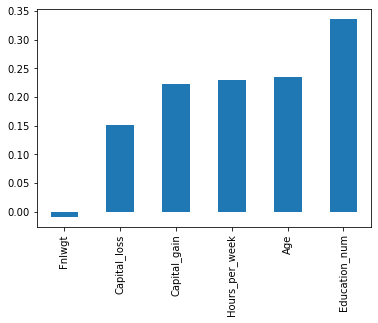

In [53]:
df[numerical_columns+['Income_ >50K']].corr()['Income_ >50K'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

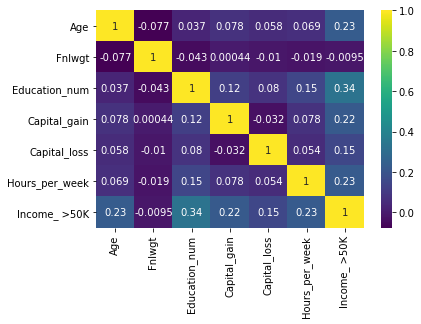

In [54]:
sns.heatmap(df[numerical_columns+['Income_ >50K']].corr(),annot=True,cmap='viridis')

splitting into X and y features

In [55]:
df.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Workclass_Local-gov', 'Workclass_Never-worked',
       'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay', 'Workclass_undisclosed',
       'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marital_status_ Widowed', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Prof-specialty',
       'Occupation_Protective-serv', 'Occupation_Sales',
       'Occupation_Tech-support', 'Occupation_Transport-moving',
       'Occupation_undisclo

In [56]:
X=df.drop('Income_ >50K',axis=1)
y=df['Income_ >50K']

# Applying different machine learning models now

## identifying the best random state

In [57]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.8257794322940902 on random state 190


best accuracy is 0.8257794322940902 on random state 190


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=183)

**TASK: Scale the X train and X test data.**

oversampling the triaing set, after the split of data into training and validation set

In [59]:
y_train.value_counts()

0    16529
1     5286
Name: Income_ >50K, dtype: int64

In [60]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

In [61]:
y_resample.value_counts()

0    16529
1    16529
Name: Income_ >50K, dtype: int64

In [63]:
X_resample.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,...,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia,Native_country_undisclosed
0,64,69525,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,40,221172,12,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,19,358631,9,0,0,25,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,50,206862,14,0,0,65,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,44,68729,10,0,1902,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_resample)
scaled_X_test = scaler.transform(X_test)

In [70]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_resample)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8190
           1       0.58      0.63      0.60      2555

    accuracy                           0.80     10745
   macro avg       0.73      0.74      0.74     10745
weighted avg       0.81      0.80      0.80     10745



In [71]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_resample)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8190
           1       0.69      0.67      0.68      2555

    accuracy                           0.85     10745
   macro avg       0.79      0.79      0.79     10745
weighted avg       0.85      0.85      0.85     10745



In [72]:
svc=SVC()
svc.fit(scaled_X_train,y_resample)
pred=svc.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      8190
           1       0.68      0.62      0.64      2555

    accuracy                           0.84     10745
   macro avg       0.78      0.76      0.77     10745
weighted avg       0.83      0.84      0.84     10745



In [73]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_resample)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      8190
           1       0.64      0.71      0.67      2555

    accuracy                           0.84     10745
   macro avg       0.77      0.79      0.78     10745
weighted avg       0.84      0.84      0.84     10745



In [74]:
dtcAC=0.80
rfcAC=0.85
svcAC=0.84
adaAC=0.84

### now checking cross val score

In [75]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),DTC)
DTCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
DTCcv

0.8055008022003209

In [76]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),RFC)
RFCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
RFCcv

0.8412560165024067

In [77]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),svc)
svcCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
svcCV

0.8034838413935367

In [78]:
imba_pipeline=make_pipeline(scaler,SMOTE(random_state=42),ada)
adaCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
adaCV

0.8284208113683246

In [79]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(svcAC-svcCV)
print(adaAC-adaCV)

-0.005500802200320898
0.00874398349759331
0.03651615860646329
0.011579188631675397


Decision Tree classifier has the less difference between the accuracy scores( on test set) and Cross val score(on validation), so it is the best model.
But choosing RandomForestClassifier as it has the highest accuracy

## HyperParameterTuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [83]:
pipeLine=Pipeline([('scaler',StandardScaler()),('smote',SMOTE(random_state=42)),('rfc',RandomForestClassifier())])


In [93]:
param_grid = {'rfc__criterion':['gini','entropy'],'rfc__min_samples_split':[2,3],'rfc__min_impurity_decrease':[0,0.01],
             'rfc__min_samples_leaf':[1,3]}
grid = GridSearchCV(pipeLine,param_grid,verbose=2)

In [94]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   5.3s
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   5.3s
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   5.1s
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   5.4s
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   5.4s
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=   5.2s
[CV] END rfc__criterion=gini, rfc__min_impurity_decrease=0, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=   5.1s
[CV] END rfc__criterion=gini,

[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   1.2s
[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   1.3s
[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=2; total time=   1.3s
[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=   1.3s
[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=   1.4s
[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=   1.3s
[CV] END rfc__criterion=entropy, rfc__min_impurity_decrease=0.01, rfc__min_samples_leaf=1, rfc__min_samples_split=3; total time=   1.6s
[CV] END rfc__criterion=entropy, rfc__min_impuri

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__min_impurity_decrease': [0, 0.01],
                         'rfc__min_samples_leaf': [1, 3],
                         'rfc__min_samples_split': [2, 3]},
             verbose=2)

In [95]:
grid.best_params_

{'rfc__criterion': 'gini',
 'rfc__min_impurity_decrease': 0,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 3}

In [96]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('rfc',
                 RandomForestClassifier(min_impurity_decrease=0,
                                        min_samples_split=3))])

In [97]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__criterion,param_rfc__min_impurity_decrease,param_rfc__min_samples_leaf,param_rfc__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.247674,0.103853,0.143279,0.002518,gini,0,1,2,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.846894,0.835434,0.837268,0.841852,0.846894,0.841669,0.004751,3
1,5.126820,0.083333,0.142449,0.009420,gini,0,1,3,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.844144,0.839102,0.838643,0.841164,0.849186,0.842448,0.003889,1
2,4.341423,0.104113,0.116122,0.014632,gini,0,3,2,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.839102,0.834518,0.831309,0.825120,0.839102,0.833830,0.005259,6
3,4.249009,0.074344,0.111897,0.007870,gini,0,3,3,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.838872,0.834976,0.832913,0.824662,0.839102,0.834105,0.005273,5
4,1.821665,0.077347,0.052213,0.005932,gini,0.01,1,2,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.739858,0.752922,0.732753,0.745817,0.757506,0.745771,0.008869,14
5,1.951537,0.310076,0.051511,0.008609,gini,0.01,1,3,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.736649,0.732065,0.759111,0.736191,0.750172,0.742837,0.010170,15
6,1.874005,0.095161,0.050853,0.006466,gini,0.01,3,2,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.741691,0.757965,0.746275,0.744442,0.752464,0.748567,0.005883,11
7,1.799510,0.093164,0.046276,0.004418,gini,0.01,3,3,"{'rfc__criterion': 'gini', 'rfc__min_impurity_...",0.741233,0.752693,0.713500,0.743067,0.754985,0.741096,0.014784,16
8,5.841836,0.098961,0.143332,0.003266,entropy,0,1,2,"{'rfc__criterion': 'entropy', 'rfc__min_impuri...",0.843227,0.837956,0.837039,0.840706,0.847582,0.841302,0.003818,4
9,5.966646,0.107621,0.174984,0.028787,entropy,0,1,3,"{'rfc__criterion': 'entropy', 'rfc__min_impuri...",0.842540,0.840706,0.839102,0.842310,0.847124,0.842356,0.002686,2


### Displaying the confusion matrix and classification report

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
grid_pred = grid.predict(X_test)

In [100]:
confusion_matrix(y_test,grid_pred)

array([[7293,  897],
       [ 762, 1793]], dtype=int64)

In [101]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8190
           1       0.67      0.70      0.68      2555

    accuracy                           0.85     10745
   macro avg       0.79      0.80      0.79     10745
weighted avg       0.85      0.85      0.85     10745



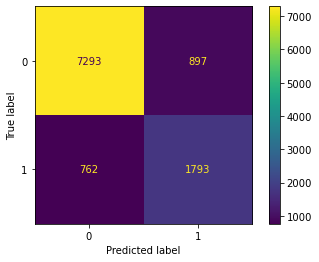

In [102]:
plot_confusion_matrix(grid,X_test,y_test)

## Training with best params

In [103]:
pipeLine=Pipeline([('scaler',StandardScaler()),('smote',SMOTE(random_state=42)),('rfc',RandomForestClassifier(criterion='gini',min_impurity_decrease=0,min_samples_leaf=1,min_samples_split=3))])

In [104]:
Final_model=pipeLine
Final_model.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('rfc',
                 RandomForestClassifier(min_impurity_decrease=0,
                                        min_samples_split=3))])

In [105]:

pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.8465332712889716


final accuracy achieved is 84.6% with RandomForestClassifier

## plotting AUC ROC CURVE

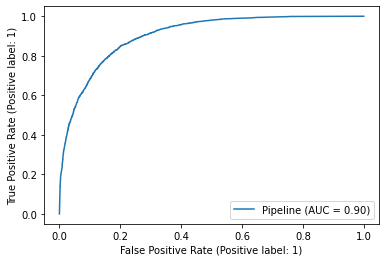

In [106]:
plot_roc_curve(Final_model,X_test,y_test)

AUC-ROC Curve area is 0.90 which is very good.

## saving the model


In [107]:
import joblib
joblib.dump(Final_model,"CensusIncomeProject.pkl")

['CensusIncomeProject.pkl']